# 주성분 분석(PCA)

### PCA : PCA는 먼저 데이터에 가장 가까운 초평면(hyperplane)을 구한 다음, 데이터를 이 초평면에 투영(projection)시킨다. PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 평균제곱거리를 최소화 하는 축을 찾는다.

#### 순서
- PCA는 다음과 같은 단계로 이루어진다. 
> 1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 
> 2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
> 3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
> 4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.
- 이렇게 i번째 축을 정의하는 단위 벡터(unit vector)를 i번째 주성분(PC, Principal Component)

- PCA는 다음과 같은 단계로 이루어진다. 
> 1. 입력 데이터 세트의 공분산 행렬을 생성한다
> 2. 공분산 행렬의 고유벡터와 고유값을 계산한다
> 3. 고유값이 가장 큰 순으로 K개 (PCA 변환 차수 만큼)만큼 고유 벡터를 추출
> 4. 고유값이 가장 큰 순으로 추출된 고유 벡터를 이용해 새롭게 입력 데이터를 변환

- sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    - n_components : Number of components to keep, default=None. 1보다 값이 크면 갯수만큼 특성이 반환되고 0~1 사이로 지정하면 pca는 해당 비율의 분산을 유지 할 수 있는 최소한의 특성 갯수를 반환. 0.95 or 0.99 자주 사용. 
    - copy : default=True. If False, data passed to fit are overwritten and running fit(X).
    - svd_solver : The solver is selected by a default policy based on X.shape and n_components. default=’auto’/{‘auto’, ‘full’, ‘arpack’, ‘randomized’}. randomized는 빠르게 수행. 
    - whiten : True이면 평균이 0이고 분산이 1이 되도록 변환. default=False

- scikit-Learn에서는 PCA를 계산할 때, 데이터셋에 대한 공분산의 고유값 분해(eigenvalue-decomposition)이 아닌 특이값 분해(SVD, Singular Value Decomposition)를 이용해 계산. 
- eigenvalue-decomposition에서는 공분산 행렬을 메모리상에 가지고 있어야하는 반면 SVD는 공분산 행렬을 따로 메모리에 저장할 필요가 없으므로 효율적이기 때문이다.
- PCA의 단점은 두 그래프의 축을 해석하기가 쉽지 않다는 점이다.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()
# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)
# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듭니다.
pca = PCA(n_components=0.99, whiten=True)
# PCA를 수행합니다.
features_pca = pca.fit_transform(features)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


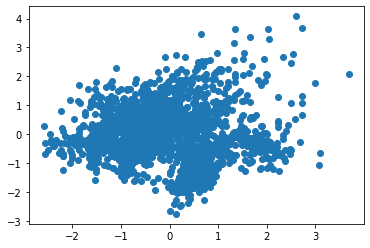

In [2]:
import matplotlib.pyplot as plt
### whiten = True 이기 때문에 스케일리이 맞춰져 있는 것을 확인 할 수 있음
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()

In [29]:
pca.components_

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [ 4.82989434e-18, -2.36573940e-02, -2.15711594e-02, ...,
         1.46857639e-02, -7.04598280e-02,  2.03743055e-02],
       [-4.23282686e-18, -1.59521850e-01, -2.79407118e-03, ...,
         1.02094964e-01,  1.00130796e-01, -9.54418079e-02],
       [ 7.46301185e-19, -2.03051327e-01, -7.68724457e-02, ...,
        -1.10157994e-01,  8.59937001e-02, -2.98885846e-02]])

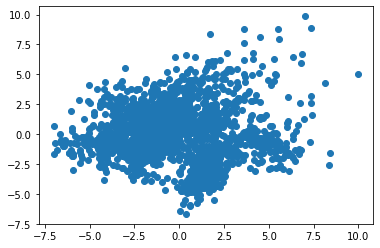

In [3]:
### whiten = False 이기 때문에 스케일링이 되어 있지 않음
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

In [28]:
# 주성분 출력
pca_nowhiten.components_

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [ 4.82989434e-18, -2.36573940e-02, -2.15711594e-02, ...,
         1.46857639e-02, -7.04598280e-02,  2.03743055e-02],
       [-4.23282686e-18, -1.59521850e-01, -2.79407118e-03, ...,
         1.02094964e-01,  1.00130796e-01, -9.54418079e-02],
       [ 7.46301185e-19, -2.03051327e-01, -7.68724457e-02, ...,
        -1.10157994e-01,  8.59937001e-02, -2.98885846e-02]])

In [9]:
pca_nowhiten.components_.shape

(54, 64)

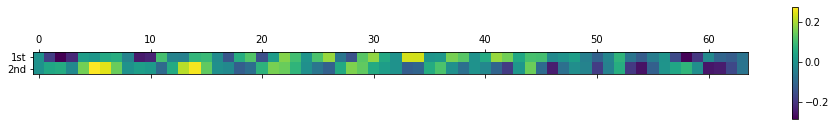

In [33]:
import matplotlib.pyplot as plt
pca = PCA(n_components=2, whiten=True)
# PCA를 수행합니다.
features_pca = pca.fit_transform(features)
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ["1st", "2nd"])
plt.colorbar()

In [10]:
import numpy as np
# features_nowhiten : PCA fit 한것이랑 실제 주성분 을 곱한 것과 비교 
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

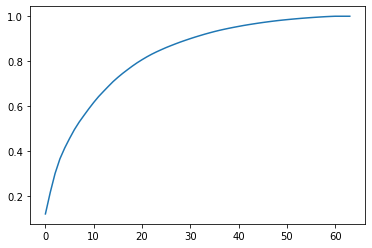

In [11]:
# explained_variance_ratio : 주성분에 의해 설명된 분산 
# cumsum : 누적 그래프 
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
# 주성분 30개에서 약 80% 이상의 분산을 유지

### 비선형 차원 축소 : 커널 트릭 사용

#### 커널트릭 : 커널 PCA에 사용할 수 있는 커널이 여러개가 있음. 가우시안 방사기저 함수 커널인 rdf 많이 사용. 이 외에는 다항식 커널(poly), 시그모이드 커널 (sigmoid), 선형 투영 (linear)
- 커널 PCA의 단점은 설정할 매개 변수가 많다는 것. sklearn 처럼 분산 비율 옵션을 사용하지 못하고 component 갯수를 지정해줘야함. 또한 자체적으로 설정해야할 하이퍼 파라미터가 있음. 또한 커널 PCA는 실제 고차원 공간으로 변환하는 것이 아니기 때문에 componetns_속성이 없음 

In [12]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# 방사 기저 함수(radius basis function, RBF)를 사용하여 "커널 PCA"를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


### 클래스 분리를 최대화하여 특성 줄이기 (LDA : 선형 판별 분석)
- LDA 는 분류 알고리즘이지만 차원 추고에도 자주 사용. 특성 공간을 저차원 공간으로 투영한다는 점에서 주성분 분석과 비슷. 
- LDA 는 클래스 간의 차이를 최대화 하는 목적을 가짐. 
- LDA 는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별 할 수 있는 기준을 최대한 유지하면서 차원을 축소 
- 클래스 간 분산은 최대한 가져가고, 클래스 내부 분산은 최대한 작게 가져가는 방식
- 순서
    > 1. 클래스 내부와 클래스 간 분산행렬을 구합니다. 이 두개의 행렬은 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터를 기반으로 구햅니다.
    > 2. 클래스 내부 분산행렬을 S(w), 클래스 간 분산 행렬을 S(b)라고 하면 다음 식으로 두행렬을 고유 벡터로 분해 할 수 있습니다.
    > 3. 고유값이 큰 순으로 K 개 추출
    > 4. 고유값이 가장 큰 순으로 추출된 고유 벡터를 이용해 새롭게 입력 데이터를 변환

In [36]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


In [14]:
# 설명하는 분산의 양 확인
lda.explained_variance_ratio_

array([0.9912126])

In [37]:
features_lda.shape

(150, 1)

In [15]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None) ### 모든 성분 특성에 의해 서명된 분산의 비율을 변환
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0

    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0

    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:

        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산이 목표치에 도달하면 
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

1

### 행렬 분해를 사용하여 특성 줄이기 (NMF)
- NMF 선형 차원 축소를 위한 비지도 학습 기법. 샘플과 특성 사이에 잠재되어 있는 관계를 표현하는 행렬로 특성 행렬을 분해
- 특성행렬이 음수를 포함 할 수 없습니다
- n components 의 최적값을 가장 좋은 방법은 최종 모델에서 가장 좋은 결과를 내는 것을 찾아 여러 시도 

In [16]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 로드합니다.
features = digits.data

# NMF를 만들고 학습하고 적용합니다.
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


원본 특성 개수: 64
줄어든 특성 개수: 10


C:\Users\USER\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [17]:
nmf.components_.shape

(10, 64)

### 희소한 데이터의 특성 줄이기 : TSVD
- TSVD 는 PCA와 비슷한데 희소 특성 행렬을 사용할 수 있다는 것이 특징
- TSVD의 이슈 하는 난수 생성기를 사용하기 때문에 출력 부호가 훈련 하는 사이에 뒤집 힐 수 있다는 것
- n components를 하이퍼 파라미터로 모델 선택 과정에서 최적화함

In [18]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 희소 행렬을 만듭니다.
features_sparse = csr_matrix(features)

# TSVD 객체를 만듭니다.
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력합니다.
print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [20]:
# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

0.3003938537993649

In [21]:
features_sparse.shape

(1797, 64)

In [22]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var):
    # 설명된 분산을 초기화합니다.
    total_variance = 0.0

    # 특성 개수를 초기화합니다.
    n_components = 0

    # 특성의 설명된 분산을 순환합니다.
    for explained_variance in var_ratio:

        # 설명된 분산을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산의 목표에 도달하면
        if total_variance >= goal_var:
            # 반복을 마칩니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(tsvd_var_ratios, 0.95)

40

### SVD (Singular Value Decomposition)
- PCA는 정방행렬만을 고유 벡터로 분해 할 수 있지만, SVD는 정방행렬뿐만 아니라, 행과 열이 크기가 다른 행렬에도 적용가능 
- 특이값 분해로 불리며, 모든 특이 벡터는 서로 직교하는 성질을 가집니다